In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
plt.rc('figure',dpi=100);

In [48]:
postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv");
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [49]:
postulaciones['fechapostulacion']=postulaciones['fechapostulacion'].astype('datetime64[ns]');
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [50]:
postulaciones.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
dtype: object

In [51]:
postulaciones['dia']=pd.DatetimeIndex(postulaciones['fechapostulacion']).day;
postulaciones['mes']=pd.DatetimeIndex(postulaciones['fechapostulacion']).month;
postulaciones['semana']=pd.DatetimeIndex(postulaciones['fechapostulacion']).week;
postulaciones['diadelasemana']=pd.DatetimeIndex(postulaciones['fechapostulacion']).weekday;
dias_de_la_semana={0:'Lunes',1:'Martes',2:'Miercoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}
postulaciones['diadelasemana'].replace(dias_de_la_semana, inplace=True)
postulaciones.head(10)

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana
0,1112257047,NM5M,2018-01-15 16:22:34,15,1,3,Lunes
1,1111920714,NM5M,2018-02-06 09:04:50,6,2,6,Martes
2,1112346945,NM5M,2018-02-22 09:04:47,22,2,8,Jueves
3,1112345547,NM5M,2018-02-22 09:04:59,22,2,8,Jueves
4,1112237522,5awk,2018-01-25 18:55:03,25,1,4,Jueves
5,1112277633,5awk,2018-01-29 13:34:44,29,1,5,Lunes
6,1112302347,5awk,2018-02-07 20:49:22,7,2,6,Miercoles
7,1112291495,5awk,2018-02-07 20:50:13,7,2,6,Miercoles
8,1112304011,5awk,2018-02-07 20:51:15,7,2,6,Miercoles
9,1112326289,5awk,2018-02-09 20:24:57,9,2,6,Viernes


In [53]:
postulaciones_febrero=postulaciones[postulaciones['mes']==2];
postulaciones_febrero.head()

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana
1,1111920714,NM5M,2018-02-06 09:04:50,6,2,6,Martes
2,1112346945,NM5M,2018-02-22 09:04:47,22,2,8,Jueves
3,1112345547,NM5M,2018-02-22 09:04:59,22,2,8,Jueves
6,1112302347,5awk,2018-02-07 20:49:22,7,2,6,Miercoles
7,1112291495,5awk,2018-02-07 20:50:13,7,2,6,Miercoles


In [54]:
postulaciones_enero=postulaciones[postulaciones['mes']==1];
postulaciones_enero.head()

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana
0,1112257047,NM5M,2018-01-15 16:22:34,15,1,3,Lunes
4,1112237522,5awk,2018-01-25 18:55:03,25,1,4,Jueves
5,1112277633,5awk,2018-01-29 13:34:44,29,1,5,Lunes
20,1112286523,ZaO5,2018-01-24 15:07:39,24,1,4,Miercoles
21,1112272060,ZaO5,2018-01-24 15:20:10,24,1,4,Miercoles


Text(0,0.5,'Cantidad de Postulaciones')

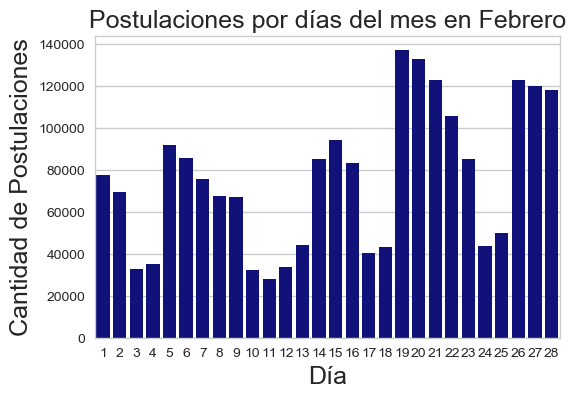

In [63]:
#Podemos ver que hay una periodicidad, y una anomalia en los feriados 12 y 13 de carnaval, pareciera ser que
#los picos en postulaciones son en dias siempre laborables
g = sns.countplot(x=postulaciones_febrero['dia'], orient='v', palette=['darkblue'])
g.set_title("Postulaciones por días del mes en Febrero", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad de Postulaciones", fontsize=18)

Text(0,0.5,'Cantidad de Postulaciones')

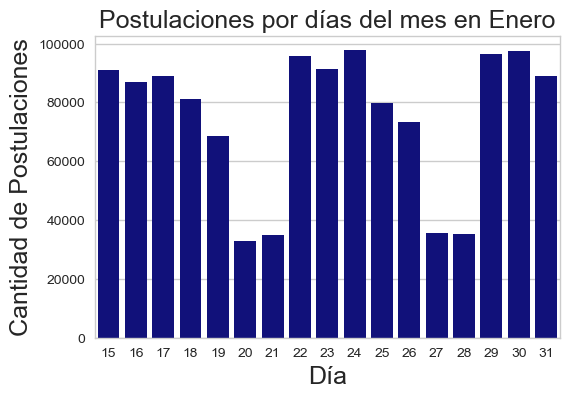

In [64]:
#Misma periodicidad
g = sns.countplot(x=postulaciones_enero['dia'], orient='v', palette=['darkblue'])
g.set_title("Postulaciones por días del mes en Enero", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad de Postulaciones", fontsize=18)

Text(0,0.5,'Cantidad de Postulaciones')

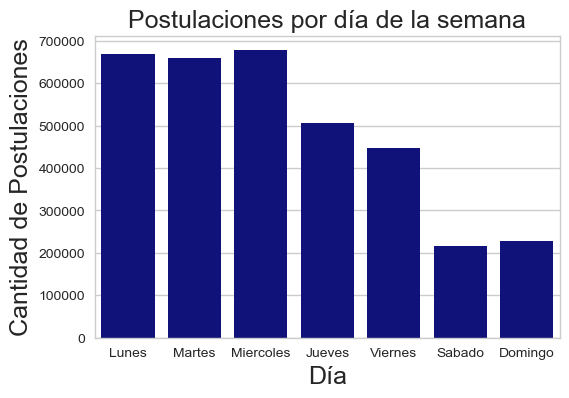

In [65]:
#Periodicidad que se explica con esto
g = sns.countplot(x=postulaciones['diadelasemana'], orient='v', order=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'], palette=['darkblue'])
g.set_title("Postulaciones por día de la semana", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad de Postulaciones", fontsize=18)